In [0]:
import os
import re
import datetime
import numpy as np
from PIL import Image
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
def prepae_data():
    x, t = [], []

    categorized_dir_paths = glob('/content/drive/My Drive/kikagaku/novelapp/data/images/categorized/*')

    for dir_path in categorized_dir_paths:
        category_id = os.path.basename(dir_path)
        image_paths = glob(os.path.join(dir_path, '*'))
        print(datetime.datetime.now().isoformat(), 'Category', category_id, ':', len(image_paths))

        for i, p in enumerate(image_paths):
            book_id = re.sub(r'(_.*$)', '', os.path.basename(p))

            if i % 10 == 0:
                print(datetime.datetime.now().isoformat(), 'Image:', i, book_id, category_id)

            try:
                img = Image.open(p)
                img_resize = img.resize((229, 229))
                img_np = np.array(img_resize) / 255.0
                img_reshape = img_np.reshape(1, 229, 229, 3)
                #print(datetime.datetime.now().isoformat(), img_np.shape, img_reshape.shape)

                x.append(img_np)
                t.append(category_id)

            except Exception as e:
                print(datetime.datetime.now().isoformat(), 'Error:', e)

    return x, t

In [7]:
x, t = prepae_data()

2020-05-29T11:27:12.458806 Category 0 : 51
2020-05-29T11:27:12.459572 Image: 0 3971 0
2020-05-29T11:27:18.766545 Image: 10 4068 0
2020-05-29T11:27:24.657289 Image: 20 4079 0
2020-05-29T11:27:30.467422 Image: 30 4077 0
2020-05-29T11:27:36.753798 Image: 40 3977 0
2020-05-29T11:27:42.987255 Image: 50 4023 0
2020-05-29T11:27:43.501013 Category 1 : 52
2020-05-29T11:27:43.501754 Image: 0 3677 1
2020-05-29T11:27:52.409149 Image: 10 3317 1
2020-05-29T11:28:00.786888 Image: 20 3417 1
2020-05-29T11:28:10.047952 Image: 30 3806 1
2020-05-29T11:28:15.868044 Image: 40 4052 1
2020-05-29T11:28:24.068089 Image: 50 2900 1
2020-05-29T11:28:26.092358 Category 2 : 49
2020-05-29T11:28:26.092566 Image: 0 2694 2
2020-05-29T11:28:35.879731 Image: 10 2888 2
2020-05-29T11:28:45.784658 Image: 20 2983 2
2020-05-29T11:28:54.992256 Image: 30 3098 2
2020-05-29T11:29:02.861076 Image: 40 3715 2
2020-05-29T11:29:08.151873 Category 3 : 52
2020-05-29T11:29:08.152746 Image: 0 2873 3
2020-05-29T11:29:17.662926 Image: 10 295

In [8]:
x = np.array(x).astype('f')
t = np.array(t).astype('f')
print(x.shape, t.shape)

(204, 229, 229, 3) (204,)


In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_val, t_train, t_val = train_test_split(x, t, test_size=0.3, random_state=0)

In [0]:
import os
import random

def reset_seed(seed=0):

    os.environ['PYTHONHASHSEED'] = '0'
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

In [12]:
category_count = len(np.unique(t))
print(np.unique(t))
print(category_count)

[0. 1. 2. 3.]
4


In [0]:
from tensorflow.keras import models, layers
from tensorflow.keras.applications import Xception

In [14]:
model_fine = Xception(include_top=False, weights='imagenet', input_shape=x_train.shape[1:])

83689472/83683744 [==============================] - 2s 0us/step


In [0]:
reset_seed(0)

model = models.Sequential()
model.add(model_fine)

#model.add(layers.Conv2D(3, (3, 3), activation='relu', input_shape=(229, 229, 3)))
#model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.BatchNormalization())
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(category_count, activation='softmax'))

#optimizer = keras.optimizers.Adagrad(lr=0.01)
optimizer = keras.optimizers.Adam(lr=0.01)

model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [16]:
history = model.fit(x_train, t_train,
                    batch_size=15,
                    epochs=30,
                    verbose=1,
                    validation_data=(x_val, t_val))

Epoch 1/30
10/10 [==============================] - 6s 609ms/step - loss: 16.7671 - accuracy: 0.2606 - val_loss: 21447049216000.0000 - val_accuracy: 0.2581
Epoch 2/30
10/10 [==============================] - 4s 376ms/step - loss: 10.1890 - accuracy: 0.2324 - val_loss: 272237133824.0000 - val_accuracy: 0.2419
Epoch 3/30
10/10 [==============================] - 4s 351ms/step - loss: 5.4109 - accuracy: 0.2746 - val_loss: 86568402944.0000 - val_accuracy: 0.2581
Epoch 4/30
10/10 [==============================] - 4s 371ms/step - loss: 4.3620 - accuracy: 0.2394 - val_loss: 96195264.0000 - val_accuracy: 0.2419
Epoch 5/30
10/10 [==============================] - 4s 374ms/step - loss: 1.9558 - accuracy: 0.2183 - val_loss: 38658536.0000 - val_accuracy: 0.2581
Epoch 6/30
10/10 [==============================] - 4s 353ms/step - loss: 2.3826 - accuracy: 0.2535 - val_loss: 82885.0469 - val_accuracy: 0.2742
Epoch 7/30
10/10 [==============================] - 4s 361ms/step - loss: 1.6157 - accuracy: 0

In [0]:
results = pd.DataFrame(history.history)

In [18]:
results.head()

,loss,accuracy,val_loss,val_accuracy
0,16.767076,0.260563,2.144705e+13,0.258065
1,10.189029,0.232394,2.722371e+11,0.241935
2,5.410863,0.274648,8.656840e+10,0.258065
3,4.361993,0.239437,9.619526e+07,0.241935
4,1.955756,0.218310,3.865854e+07,0.258065


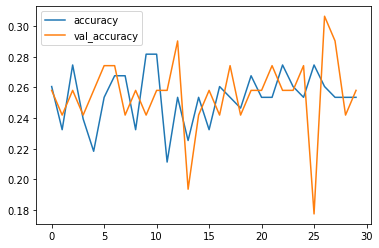

In [19]:
results[['accuracy', 'val_accuracy']].plot()

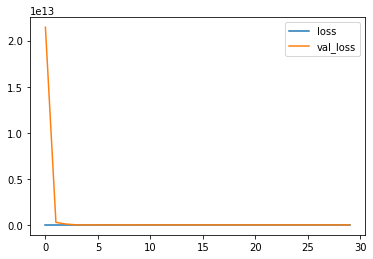

In [20]:
results[['loss', 'val_loss']].plot()